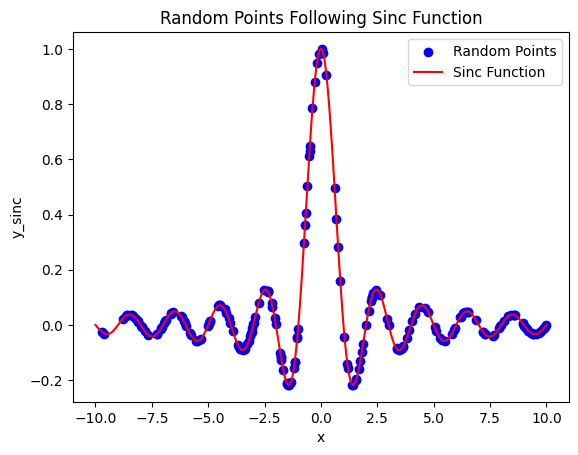

tensor([-0.0672, -0.0938,  0.1031, -0.0375,  0.0180, -0.1599,  0.0433,  0.0060,
        -0.0777,  0.1289, -0.0538, -0.0651,  0.2521,  0.0910,  0.0344, -0.1466,
         0.0187, -0.1157, -0.0072,  0.0454,  0.0158, -0.0052, -0.0559, -0.0902,
         0.1050,  0.0455, -0.0241,  0.0014,  0.0191, -0.1791,  0.0904, -0.0964,
        -0.0056, -0.0175, -0.0673, -0.0399, -0.1219, -0.0970, -0.0348, -0.0088,
        -0.1307,  0.0041, -0.0496, -0.0867, -0.0509,  0.0670, -0.2009, -0.1328,
        -0.1551, -0.1250,  0.0563,  0.0764,  0.0367,  0.0351, -0.0401, -0.0684,
         0.1173,  0.0923,  0.1093,  0.0539, -0.1113, -0.0527, -0.0198, -0.0399,
         0.0426,  0.0983,  0.0836,  0.0908, -0.1095, -0.1298, -0.1086,  0.0389,
         0.0964,  0.0943, -0.0204,  0.0097,  0.1424,  0.1214, -0.1086,  0.0161,
        -0.1452, -0.0347, -0.0101, -0.2556, -0.1536,  0.0996, -0.0053,  0.1218,
         0.1092,  0.1377, -0.1164, -0.0462, -0.0666, -0.1222, -0.1315,  0.0638,
         0.0272,  0.0013,  0.0956,  0.14

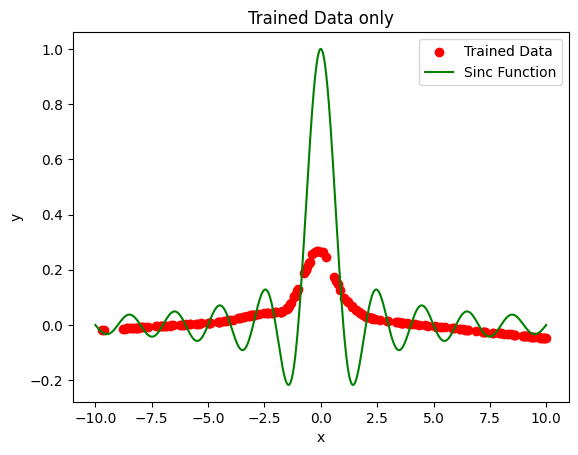

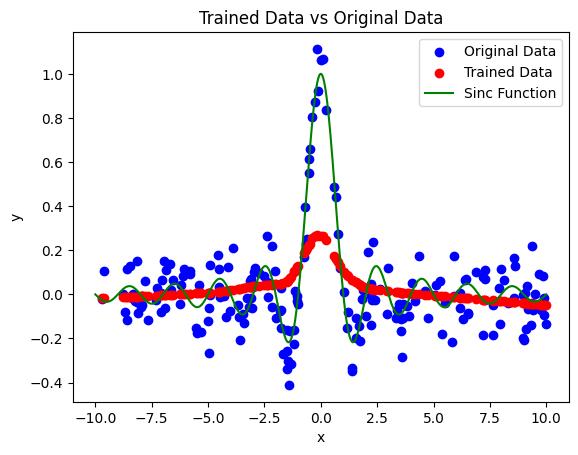

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the range of x-values
x_min = -10
x_max = 10

# Define the number of random points to generate
num_points = 200

# Generate random x-values
x = np.random.uniform(x_min, x_max, num_points)

# Calculate y-values using sinc function
y_sinc = np.sinc(x)

# Plot the random points TASK1
plt.scatter(x, y_sinc, c='blue', marker='o', label='Random Points')

# Plot the sinc function curve
x_curve = np.linspace(x_min, x_max, 1000)
y_curve = np.sinc(x_curve)
plt.plot(x_curve, y_curve, c='red', label='Sinc Function')

# Set plot properties
plt.xlabel('x')
plt.ylabel('y_sinc')
plt.title('Random Points Following Sinc Function')
plt.legend()

# Display the plot TASK2
plt.show()


# Generate random noise
noise = np.random.normal(0, 0.1, num_points)

# Add noise to the sinc function data
y_data = y_sinc + noise

# Convert noise to tensor format TASK3

noise_tensor = torch.from_numpy(noise).float()
x_tensor = torch.from_numpy(x.reshape(-1, 1)).float()
y_tensor = torch.from_numpy(y_data.reshape(-1, 1)).float()

# Print the noise tensor
print(noise_tensor)

# function as model TASK4

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = MyModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#train the function or the modeled function TASK5

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every few epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Convert the predicted values to numpy array
with torch.no_grad():
    y_pred_np = model(x_tensor).numpy()



#DIFF between ploted trained function data and sinc function data TASK6

# Plot the original data and the trained data
plt.scatter(x, y_pred_np, c='red', label='Trained Data')

x_curve = np.linspace(x_min, x_max, 1000)
y_curve = np.sinc(x_curve)

plt.plot(x_curve, y_curve, c='green', label='Sinc Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Data only')
plt.legend()
plt.show()


plt.scatter(x, y_data, c='blue', label='Original Data')
plt.scatter(x, y_pred_np, c='red', label='Trained Data')
x_curve = np.linspace(x_min, x_max, 1000)
y_curve = np.sinc(x_curve)
plt.plot(x_curve, y_curve, c='green', label='Sinc Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Data vs Original Data')
plt.legend()
plt.show()



